In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt
import json

In [3]:
with open('../secrets.json') as file:
    secrets = json.load(file)
    connection_string = secrets['connection_string']
    
db = create_engine(connection_string)
df = pd.read_sql('SELECT * FROM NAP.article', con=db)

df

,id,post_id,post_title,url,score,publisher,headline,date_published,content
0,1,fra8wl,Top US general resists Trump administration?s ...,https://mondoweiss.net/2020/03/top-u-s-general...,10285,mondoweiss,Top U.S. general resists Trump administration?...,2020-03-28 15:44:00,A brave U.S. army lieutenant general may be ri...
1,2,frcvgj,Experts believe the explosion of coronavirus c...,https://www.si.com/soccer/2020/03/25/atalanta-...,2854,si,Atalanta vs Valencia linked to accelerating co...,2020-03-25 00:00:00,ROME (AP) ? It was the biggest soccer game in ...
2,3,fr5uqd,Boris Johnson's government is reportedly furio...,https://www.businessinsider.com/coronavirus-bo...,79397,businessinsider,Boris Johnson's government is reportedly furio...,2020-03-29 00:00:00,"UK government officials say there'll be ""recko..."
3,4,fr7uzc,Toyota Gearing Up To Build Ventilators And Fac...,https://www.carscoops.com/2020/03/toyota-geari...,4988,carscoops,Toyota Gearing Up To Build Ventilators And Fac...,2020-03-27 22:36:00,"The United States will soon have over 100,000 ..."
4,5,frbkqr,Prime Minister Justin Trudeau says Health Cana...,https://www.ctvnews.ca/health/coronavirus/trud...,2341,ctvnews,Trudeau vows 'no corners cut' in accepting mas...,2020-03-29 13:04:00,TORONTO -- Prime Minister Justin Trudeau says ...
...,...,...,...,...,...,...,...,...,...
5533,5550,m3c60o,"Us secretary of state calls Taiwan ""country""",https://www.taiwannews.com.tw/en/news/4148761,64413,taiwannews,US secretary of state calls Taiwan 'country',None,TAIPEI (Taiwan News) — U.S. Secretary of State...
5534,5551,m3o54g,Mysterious attacks on at least a dozen tankers...,https://www.businessinsider.com/israel-reporte...,1063,businessinsider,Mysterious attacks on at least a dozen tankers...,2021-03-12 00:00:00,Israel has targeted tankers carrying Iranian o...
5535,5552,m3igdb,Britain advises its citizens to flee Myanmar a...,https://www.theguardian.com/world/2021/mar/12/...,1651,theguardian,Britain advises its citizens to flee Myanmar a...,2021-03-12 00:00:00,The British government has urged its citizens ...
5536,5553,m3ibzy,"S. Korea to ban military exports to Myanmar, m...",http://yna.kr/AEN20210312009200325,1238,yna,"S. Korea to ban military exports to Myanmar, m...",2021-03-12 17:28:37,"As part of a humanitarian measure, the governm..."


In [4]:
headlines = df[:15]['headline']
headlines

0     Top U.S. general resists Trump administration?...
1     Atalanta vs Valencia linked to accelerating co...
2     Boris Johnson's government is reportedly furio...
3     Toyota Gearing Up To Build Ventilators And Fac...
4     Trudeau vows 'no corners cut' in accepting mas...
5     Endangered sea turtles hatch on Brazil's deser...
6     Edward Snowden says COVID-19 could give govern...
7     UN Environment Chief Warns ?Nature is Sending ...
8     'So easy I thought it was fake': CRA’s CERB sy...
9     Wimbledon paid pandemic insurance for almost 2...
10    Pope condemns those trying to make quick buck ...
11    US intelligence warned in November that corona...
12    Donald Trump sends 200 ventilators to the UK a...
13    Iran ‘hides 500,000 virus cases,’ says member ...
14                                     Are you a robot?
Name: headline, dtype: object

In [14]:
for headline in headlines:
    blob = TextBlob(headline)
    print(f'{headline}: {round(blob.sentiment.polarity, 2)}')

Top U.S. general resists Trump administration?s efforts to provoke war with Iran ? Mondoweiss: 0.28
Atalanta vs Valencia linked to accelerating coronavirus spread: 0.0
Boris Johnson's government is reportedly furious with China and believes it could have 40 times more coronavirus cases than it claims: 0.5
Toyota Gearing Up To Build Ventilators And Face Shields As Mercedes Offers Use Of 3D Printers: 0.1
Trudeau vows 'no corners cut' in accepting masks, other supplies from China: -0.12
Endangered sea turtles hatch on Brazil's deserted beaches: 0.0
Edward Snowden says COVID-19 could give governments invasive new data-collection powers that could last long after the pandemic: 0.03
UN Environment Chief Warns ?Nature is Sending Us a Message? Through The Coronavirus Pandemic: 0.0
'So easy I thought it was fake': CRA’s CERB system gets stellar reviews in first days of operation: 0.11
Wimbledon paid pandemic insurance for almost 20 years. Now it’s getting $141 million: 0.0
Pope condemns those t

In [15]:
blob1 = TextBlob('I think this is good')
blob2 = TextBlob('He won the race')

print(blob1.sentiment)
print(blob2.sentiment)

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)


In [16]:
polarities = []
subjectivities = []

for i in range(len(df)):
    headline = df.iloc[i]['headline']
    blob = TextBlob(headline)
    
    polarities.append(blob.sentiment.polarity)
    subjectivities.append(blob.sentiment.subjectivity)

In [17]:
df['polarity'] = polarities
df['subjectivity'] = subjectivities

In [18]:
df.describe()

,id,score,polarity,subjectivity
count,5538.000000,5538.000000,5538.000000,5538.000000
mean,2785.444204,9570.540628,0.014216,0.222212
std,1598.923728,19780.778418,0.211412,0.283024
min,1.000000,0.000000,-1.000000,0.000000
25%,1401.250000,662.250000,0.000000,0.000000
50%,2785.500000,1629.000000,0.000000,0.050000
75%,4169.750000,4757.250000,0.041667,0.427273
max,5554.000000,181809.000000,1.000000,1.000000


In [19]:
positive = df[df['polarity'] > 0.01].reset_index(drop=True)
neutral = df[(df['polarity'] >= -0.01) & (df['polarity'] <= 0.01)].reset_index(drop=True)
negative = df[df['polarity'] < -0.01].reset_index(drop=True)

print(f'Positive: {len(positive)}')
print(f'Neutral: {len(neutral)}')
print(f'Negative: {len(negative)}')

Positive: 1449
Neutral: 2967
Negative: 1122


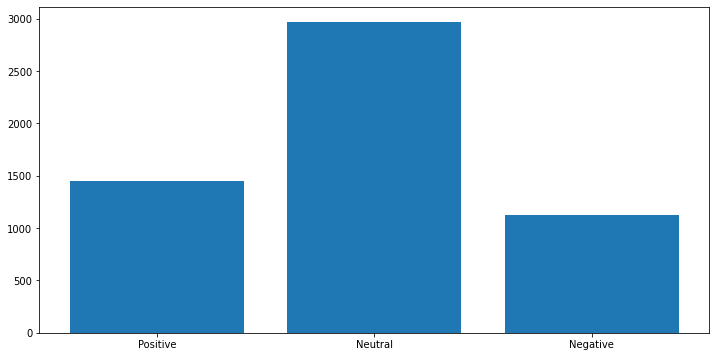

In [20]:
counts = [len(positive), len(neutral), len(negative)]
labels = ['Positive', 'Neutral', 'Negative']

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.show()

# Average subjectivity broken down by sentiment

Average subjectivity for positive headlines

In [21]:
sum(positive['subjectivity']) / len(positive)

0.4590160202372082

Average subjectivity for neutral headlines

In [22]:
sum(neutral['subjectivity']) / len(neutral)

0.04222273359154041

Average subjectivity for negative headlines

In [23]:
sum(negative['subjectivity']) / len(negative)

0.392354281191179

In [24]:
sorted_df = df.sort_values('polarity')
sorted_df

,id,post_id,post_title,url,score,publisher,headline,date_published,content,polarity,subjectivity
4634,4651,kt6r94,Trudeau says 'shocking' riot in Washington was...,https://www.cbc.ca/news/politics/riots-washing...,90877,cbc,Trudeau says 'shocking' riot in Washington was...,None,Prime Minister Justin Trudeau said today this ...,-1.0,1.0
4384,4401,khmo4x,Hundreds of children stood trial for ‘insultin...,https://english.alarabiya.net/en/News/middle-e...,10280,alarabiya,Hundreds of children stood trial for ‘insultin...,2020-12-20 00:00:00,Figures have shown 903 minors – including 264 ...,-1.0,1.0
5113,5130,li2znb,These satellite images capture the enormity of...,https://www.abc.net.au/news/2021-02-11/satelli...,220,abc,These satellite images capture the enormity of...,2021-02-11 00:00:00,These satellite images capture the enormity of...,-1.0,1.0
5220,5237,lnjd17,John Kerry says Earth has 9 years to avert the...,https://www.cbsnews.com/news/climate-change-9-...,1383,cbsnews,John Kerry says Earth has 9 years to avert the...,None,The wild winter weather this week has been cal...,-1.0,1.0
195,212,g159eh,Cruel Bear Bile Industry Thrives Despite Pande...,http://www.guelphnow.ca/npps/story.cfm?nppage=...,28,guelphnow,Cruel Bear Bile Industry Thrives Despite Pande...,None,Bears caged so bile can be extracted from thei...,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4128,4145,k6nyrc,Legendary Afghan pilot in hiding after U.S. re...,https://www.washingtonpost.com/national-securi...,3176,washingtonpost,Legendary Afghan pilot in hiding after U.S. re...,2020-12-03 00:00:00,His actions were featured in a video by the U....,1.0,1.0
2676,2693,ikjgb7,Ice Sheet Melting Is Perfectly in Line With Ou...,https://www.sciencealert.com/ice-sheet-melting...,5249,sciencealert,Ice Sheet Melting Is Perfectly in Line With Ou...,None,"The Greenland and Antarctic ice sheets, which ...",1.0,1.0
3181,3198,j5jnzc,Coronavirus has infected maximum of 10% of wor...,https://www.independent.co.uk/news/world/coron...,342,independent,Coronavirus has infected 10% of world populati...,2020-10-05 11:52:42,Around 10 per cent of the global population ma...,1.0,0.3
2858,2875,irnwqg,"39,000-year-old cave bear is discovered perfec...",https://www.dailymail.co.uk/news/article-87259...,27753,dailymail,"39,000-year-old cave bear is discovered perfec...",2020-09-12 17:28:24,"Russian scientists have discovered a 39,000-ye...",1.0,1.0


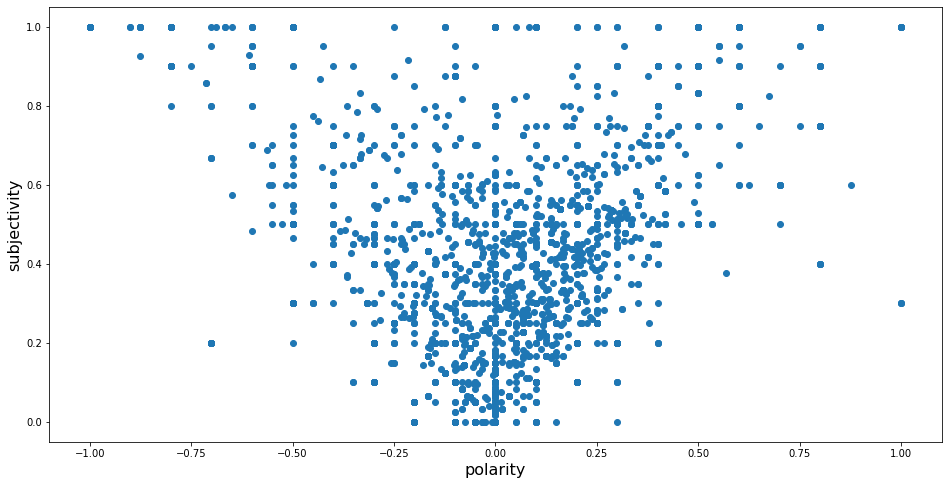

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(sorted_df['polarity'], sorted_df['subjectivity'])
plt.xlabel('polarity', fontsize=16)
plt.ylabel('subjectivity', fontsize=16)
plt.show()